# Data analysis for assignment 1

## Import packages

For this analysis, we need pandas for data manipulation and seaborn for plotting. Matplotlib is sometimes useful in tandem with seaborn because it exposes some lower-level plotting functions.

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [122]:
gcc = pd.read_csv('./output_gcc.tsv', sep = '\t')
gcc2 = pd.read_csv('./output_gcc2.tsv', sep = '\t')
gcc3 = pd.read_csv('./output_gcc3.tsv', sep = '\t')
gcc4 = pd.read_csv('./output_gcc4.tsv', sep = '\t')
icc = pd.read_csv('./output_icc.tsv', sep = '\t')
results = pd.concat([gcc, gcc2, gcc3, gcc4, icc])

# Preview results
results

,idx,input_file,strategy,time,tflops,tmin,tmax,tdif,tavg,compiler,flags,n_cols,n_rows,period,max_iter,threshold
0,0,areas_100x150.pgm,seq,0.002763,6.567958e+08,26.38950,79.38623,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,10,10,0.00001
1,1,areas_100x150.pgm,simd,0.000954,1.903284e+09,26.44264,79.34817,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,10,10,0.00001
2,2,areas_100x150.pgm,seq,0.002633,6.848558e+08,26.38950,79.38623,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,50,10,0.00001
3,3,areas_100x150.pgm,simd,0.000482,3.739640e+09,26.44264,79.34817,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,50,10,0.00001
4,4,areas_100x150.pgm,seq,0.002091,8.616364e+08,26.38950,79.38623,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,100,10,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2515,uni_100x150.pgm,simd,0.000605,2.999559e+09,49.80392,49.80392,0.000000,49.80392,icc,-O3 -march=core-avx2,100,150,10,10000,1.00000
2516,2516,uni_100x150.pgm,seq,0.007865,1.146219e+09,49.80392,49.80392,0.000000,49.80392,icc,-O3 -march=core-avx2,100,150,50,10000,1.00000
2517,2517,uni_100x150.pgm,simd,0.002644,3.410083e+09,49.80392,49.80392,0.000000,49.80392,icc,-O3 -march=core-avx2,100,150,50,10000,1.00000
2518,2518,uni_100x150.pgm,seq,0.016589,1.085991e+09,49.80392,49.80392,0.000000,49.80392,icc,-O3 -march=core-avx2,100,150,100,10000,1.00000


In [123]:
results[results['strategy'] == 'auto']

,idx,input_file,strategy,time,tflops,tmin,tmax,tdif,tavg,compiler,flags,n_cols,n_rows,period,max_iter,threshold
2,2,areas_100x150.pgm,auto,0.002604,6.970520e+08,26.38950,79.38623,4.238701e-02,48.33468,gcc,-O2 -mavx2 -mfma,100,150,10,10,0.00001
5,5,areas_100x150.pgm,auto,0.002071,8.705943e+08,26.38950,79.38623,4.238701e-02,48.33468,gcc,-O2 -mavx2 -mfma,100,150,50,10,0.00001
8,8,areas_100x150.pgm,auto,0.001736,1.037816e+09,26.38950,79.38623,4.238701e-02,48.33468,gcc,-O2 -mavx2 -mfma,100,150,100,10,0.00001
11,11,areas_100x150.pgm,auto,0.001732,1.048135e+09,26.38950,79.38623,4.238701e-02,48.33468,gcc,-O2 -mavx2 -mfma,100,150,10,10,0.00010
14,14,areas_100x150.pgm,auto,0.001597,1.128930e+09,26.38950,79.38623,4.238701e-02,48.33468,gcc,-O2 -mavx2 -mfma,100,150,50,10,0.00010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,10067,uni_100x150.pgm,auto,0.013243,1.360359e+09,49.80392,49.80392,0.000000e+00,49.80392,gcc,-O3 -mavx2 -mfma -ffast-math,100,150,100,10000,0.10000
17630,10070,uni_100x150.pgm,auto,0.000721,1.268694e+09,49.80392,49.80392,7.105427e-15,49.80392,gcc,-O3 -mavx2 -mfma -ffast-math,100,150,5,10000,1.00000
17633,10073,uni_100x150.pgm,auto,0.001368,1.326815e+09,49.80392,49.80392,7.105427e-15,49.80392,gcc,-O3 -mavx2 -mfma -ffast-math,100,150,10,10000,1.00000
17636,10076,uni_100x150.pgm,auto,0.006649,1.355779e+09,49.80392,49.80392,0.000000e+00,49.80392,gcc,-O3 -mavx2 -mfma -ffast-math,100,150,50,10000,1.00000


In [124]:
def parse_optimization_level(row):
    if 'O2' in row['flags']:
        return '-O2'
    else:
        return '-O3'
    
def parse_fast_math(row):
    if 'fast-math' in row['flags'] or row['compiler'] == 'icc':
        return '-ffast-math'
    else:
        return '-fno-fast-math'
    
def parse_matrix_size(row):
    return f"{ row['n_cols'] }x{ row['n_rows'] }"

results['optimization level'] = results.apply(parse_optimization_level, axis = 1)
results['matrix size'] = results.apply(parse_matrix_size, axis = 1)
results['fast math'] = results.apply(parse_fast_math, axis = 1)

results['gigaFLOPS'] = results['tflops'] / 1e9
results = results.rename({ 'max_iter': 'iterations' }, axis = 1)

# Preview processed dataframe
results

,idx,input_file,strategy,time,tflops,tmin,tmax,tdif,tavg,compiler,flags,n_cols,n_rows,period,iterations,threshold,optimization level,matrix size,fast math,gigaFLOPS
0,0,areas_100x150.pgm,seq,0.002763,6.567958e+08,26.38950,79.38623,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,10,10,0.00001,-O2,100x150,-fno-fast-math,0.656796
1,1,areas_100x150.pgm,simd,0.000954,1.903284e+09,26.44264,79.34817,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,10,10,0.00001,-O2,100x150,-fno-fast-math,1.903284
2,2,areas_100x150.pgm,seq,0.002633,6.848558e+08,26.38950,79.38623,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,50,10,0.00001,-O2,100x150,-fno-fast-math,0.684856
3,3,areas_100x150.pgm,simd,0.000482,3.739640e+09,26.44264,79.34817,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,50,10,0.00001,-O2,100x150,-fno-fast-math,3.739640
4,4,areas_100x150.pgm,seq,0.002091,8.616364e+08,26.38950,79.38623,0.042387,48.33468,gcc,-O2 -mavx2 -mfma,100,150,100,10,0.00001,-O2,100x150,-fno-fast-math,0.861636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2515,uni_100x150.pgm,simd,0.000605,2.999559e+09,49.80392,49.80392,0.000000,49.80392,icc,-O3 -march=core-avx2,100,150,10,10000,1.00000,-O3,100x150,-ffast-math,2.999559
2516,2516,uni_100x150.pgm,seq,0.007865,1.146219e+09,49.80392,49.80392,0.000000,49.80392,icc,-O3 -march=core-avx2,100,150,50,10000,1.00000,-O3,100x150,-ffast-math,1.146219
2517,2517,uni_100x150.pgm,simd,0.002644,3.410083e+09,49.80392,49.80392,0.000000,49.80392,icc,-O3 -march=core-avx2,100,150,50,10000,1.00000,-O3,100x150,-ffast-math,3.410083
2518,2518,uni_100x150.pgm,seq,0.016589,1.085991e+09,49.80392,49.80392,0.000000,49.80392,icc,-O3 -march=core-avx2,100,150,100,10000,1.00000,-O3,100x150,-ffast-math,1.085991


In [125]:
seq = results[results['strategy'] == 'seq']
simd = results[results['strategy'] == 'simd']
parameter_analysis = simd[simd['compiler'] == 'gcc']
parameter_analysis = parameter_analysis[parameter_analysis['flags'] == '-O2 -mavx2 -mfma']
parameter_analysis = parameter_analysis[parameter_analysis['input_file'] == 'areas_100x150.pgm']

In [126]:
sns.set_theme(style="whitegrid")

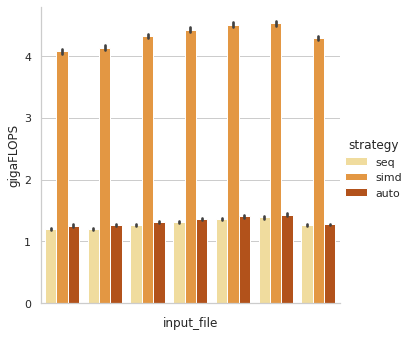

In [127]:
g = sns.catplot(kind = 'bar', data = results[~results['input_file'].str.contains("test")], x = 'input_file', y = 'gigaFLOPS', hue = 'strategy', palette = 'YlOrBr')
plt.xticks(rotation=90)
g.set(xticklabels=[])
plt.savefig('seq_simd_auto.pdf', dpi = 700)

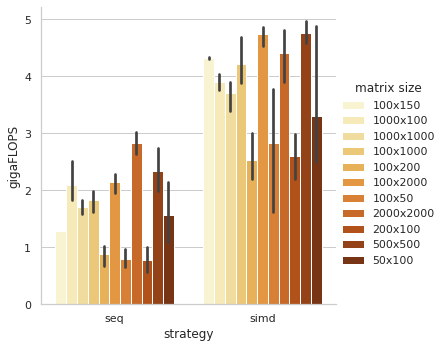

In [128]:
sns.catplot(kind = 'bar', data = results[results['strategy'] != 'auto'], hue = 'matrix size', x = 'strategy', y = 'gigaFLOPS', palette = 'YlOrBr')
plt.savefig('matrix_size.pdf', dpi = 700)

/tmp/ipykernel_12911/610932673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes['matrix size'] = sizes['n_cols'] * sizes['n_rows']


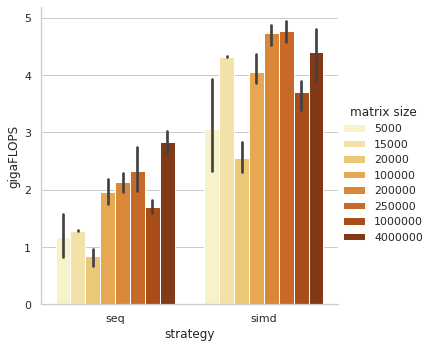

In [129]:
sizes = results[results['strategy'] != 'auto']
sizes['matrix size'] = sizes['n_cols'] * sizes['n_rows']
sns.catplot(kind = 'bar', data = sizes, hue = 'matrix size', x = 'strategy', y = 'gigaFLOPS', palette = 'YlOrBr')
plt.savefig('matrix_size_2.pdf', dpi = 700)

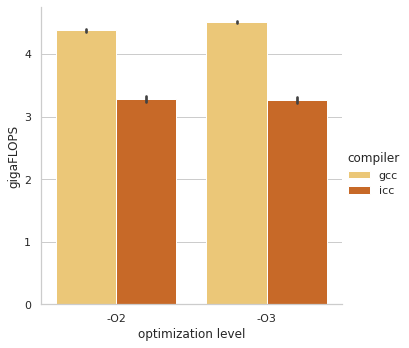

In [130]:
sns.catplot(kind = 'bar', data = simd, x = 'optimization level', hue = 'compiler', y = 'gigaFLOPS', palette = 'YlOrBr')
plt.savefig('optimization_level.pdf', dpi = 700)

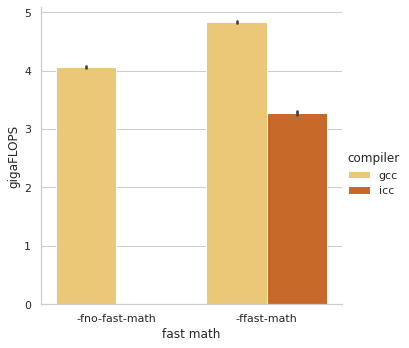

In [131]:
sns.catplot(kind = 'bar', data = simd, x = 'fast math', hue = 'compiler', y = 'gigaFLOPS', palette = 'YlOrBr')
plt.savefig('fast_math.pdf', dpi = 700)

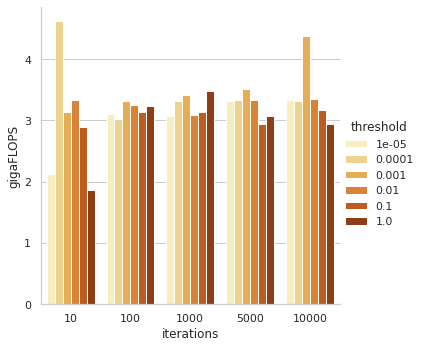

In [132]:
sns.catplot(kind = 'bar', data = parameter_analysis[parameter_analysis['period'] == 5], x = 'iterations', y = 'gigaFLOPS', hue = 'threshold', palette = 'YlOrBr')
plt.savefig('period_5.pdf', dpi = 700)

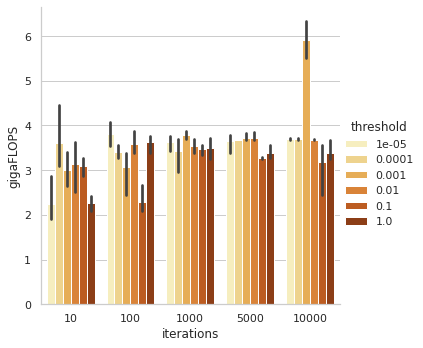

In [133]:
sns.catplot(kind = 'bar', data = parameter_analysis[parameter_analysis['period'] == 10], x = 'iterations', y = 'gigaFLOPS', hue = 'threshold', palette = 'YlOrBr')
plt.savefig('period_10.pdf', dpi = 700)

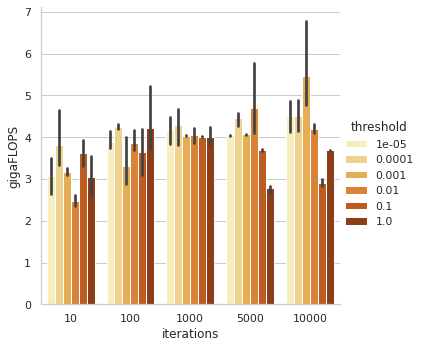

In [134]:
sns.catplot(kind = 'bar', data = parameter_analysis[parameter_analysis['period'] == 50], x = 'iterations', y = 'gigaFLOPS', hue = 'threshold', palette = 'YlOrBr')
plt.savefig('period_50.pdf', dpi = 700)

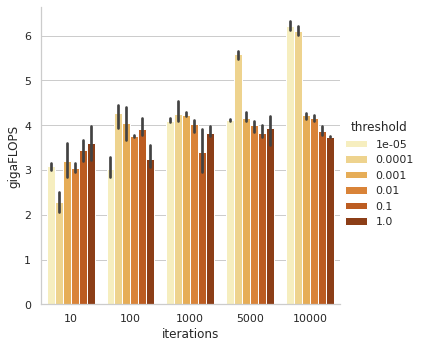

In [135]:
sns.catplot(kind = 'bar', data = parameter_analysis[parameter_analysis['period'] == 100], x = 'iterations', y = 'gigaFLOPS', hue = 'threshold', palette = 'YlOrBr')
plt.savefig('period_100.pdf', dpi = 700)